## Assignment

In [278]:
import pandas as pd
#pd.set_option("display.height", 1000)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [279]:
#Import data
data = pd.read_csv("prediktiv_data.csv", index_col="id")

In [280]:
#Inspect data
data.shape

(2930, 25)

In [281]:
data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,1960,1,NaN,NaN,red,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,1961,1,NaN,dog,red,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,1958,1,NaN,NaN,red,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,1968,2,NaN,NaN,red,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,1997,2,NaN,dog,red,1,bad,bad,3,1,3,2010,1,701,1998


 We have NaN values and a mix between numerical and categorical values

In [282]:
#Count NaN values
nan_columns = data.isna().sum()
print(nan_columns)

target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64


# 1. Prepare data
Columns feature11, 12, 15 has over, or slightly below 50%
NaN values in them. I will exclude these features by deleting these three coulmns.

Columns Feature1, 2, 4, 13 has one NaN each, I chose to delete these specific rows, because they will not impact the result significantly.

In [283]:
#Delete columns feature11, 12, 14 inplace
data = data.drop(["feature11","feature12","feature15"],axis=1);

In [284]:
data.shape

(2930, 22)

In [285]:
nan_columns = data.isna().sum()
print(nan_columns)

target         0
feature01      1
feature02      1
feature03      0
feature04      1
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      1
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64


In [286]:
#Delete rows that include one NaN value
data = data.dropna(axis=0)

In [287]:
data.shape

(2927, 22)

In [288]:
nan_columns = data.isna().sum()
print(nan_columns)

target         0
feature01      0
feature02      0
feature03      0
feature04      0
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      0
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64


Inspect the categorical columns

In [289]:
data.dtypes

target           int64
feature01      float64
feature02      float64
feature03        int64
feature04      float64
feature05        int64
feature06        int64
feature07        int64
feature08        int64
feature09        int64
feature10        int64
feature10.1      int64
feature13       object
feature14        int64
feature16       object
feature17        int64
feature18        int64
feature19        int64
feature20        int64
feature21        int64
feature22        int64
feature23        int64
dtype: object

Check unique values in the categorical columns

In [291]:
data["feature13"].unique()

array(['red', 'blue', 'green', 'yellow', 'pink'], dtype=object)

In [292]:
data["feature16"].unique()

array(['bad', 'good', 'amazing', 'okay', 'horrible'], dtype=object)

Create dummy variables

In [293]:
data = pd.concat([data, pd.get_dummies(data["feature13"], prefix="color", drop_first=False)],axis=1)
data = pd.concat([data, pd.get_dummies(data["feature16"], prefix="rate", drop_first=False)],axis=1)
data.drop(["feature13","feature16"], axis=1, inplace=True)

In [294]:
data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23,color_blue,color_green,color_pink,color_red,color_yellow,rate_amazing,rate_bad,rate_good,rate_horrible,rate_okay
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,1960,1,2,3,1,5,2010,0,0,1960,0,0,0,1,0,0,1,0,0,0
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,1961,1,0,2,1,6,2010,0,0,1961,0,0,0,1,0,0,1,0,0,0
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,1958,1,0,3,1,6,2010,1,0,1958,0,0,0,1,0,0,0,1,0,0
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,1968,2,2,3,1,4,2010,1,0,1968,0,0,0,1,0,1,0,0,0,0
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,1997,2,1,3,1,3,2010,1,701,1998,0,0,0,1,0,0,1,0,0,0


In [295]:
data.shape

(2927, 30)

Check correlation between variables, and between variables and target

In [296]:
#sns.histplot(data["feature23"])

In [297]:
#Correlation between variables and target, highest correlated shown first in the list
corr_features = data.corr().loc["target"].apply(np.abs).sort_values(ascending=False).index[1:29]
corr_features

Index(['feature08', 'feature07', 'feature01', 'feature02', 'feature04', 'feature05', 'feature10', 'feature10.1', 'rate_amazing', 'feature23', 'rate_bad', 'feature06', 'feature14', 'rate_good', 'feature21', 'feature22', 'color_red', 'color_blue', 'rate_okay', 'feature17', 'color_green', 'feature18', 'feature09', 'feature03', 'color_yellow', 'feature19', 'feature20', 'color_pink'], dtype='object')

In [298]:
#Correlation matrix
data.corr().abs()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23,color_blue,color_green,color_pink,color_red,color_yellow,rate_amazing,rate_bad,rate_good,rate_horrible,rate_okay
target,1.000000,0.647761,0.640272,0.068385,0.632425,0.621638,0.495155,0.706776,0.799182,0.101180,0.558529,0.545682,0.474338,0.143568,0.119982,0.034750,0.030579,0.284918,0.269447,0.532973,0.190808,0.123972,0.026344,0.239014,0.059416,0.537576,0.526918,0.304626,0.016973,0.146828
feature01,0.647761,1.000000,0.889711,0.030383,0.437945,0.439532,0.355206,0.488655,0.599516,0.181153,0.537322,0.477973,0.321139,0.091019,0.037149,0.049630,0.022454,0.233168,0.181844,0.425086,0.191820,0.122547,0.018644,0.237481,0.052795,0.284732,0.385613,0.304826,0.018644,0.187256
feature02,0.640272,0.889711,1.000000,0.053033,0.485529,0.491102,0.327038,0.484700,0.563316,0.153491,0.480248,0.407421,0.293595,0.073340,0.057876,0.039254,0.012953,0.178336,0.128501,0.376370,0.173199,0.126755,0.011598,0.221713,0.048270,0.308060,0.360793,0.263947,0.025180,0.175810
feature03,0.068385,0.030383,0.053033,1.000000,0.072116,0.121810,0.072103,0.135491,0.030352,0.016768,0.002187,0.028227,0.098432,0.036699,0.013080,0.042292,0.052551,0.001510,0.044650,0.011416,0.016475,0.008314,0.001166,0.019103,0.003301,0.027017,0.035463,0.025282,0.001166,0.009871
feature04,0.632425,0.437945,0.485529,0.072116,1.000000,0.800630,0.281020,0.444888,0.547121,0.173633,0.408323,0.325703,0.332707,0.052081,0.038974,0.016280,0.010417,0.054748,0.204948,0.298363,0.129606,0.105472,0.003815,0.171160,0.039386,0.367745,0.319604,0.167304,0.015230,0.102174
feature05,0.621638,0.439532,0.491102,0.121810,0.800630,1.000000,0.390173,0.562298,0.477502,0.156964,0.310711,0.372035,0.405935,0.106560,0.075891,0.039953,0.013693,0.104163,0.249938,0.242507,0.095606,0.081379,0.003909,0.128777,0.033177,0.368615,0.276802,0.119358,0.020513,0.089583
feature06,0.495155,0.355206,0.327038,0.072103,0.281020,0.390173,1.000000,0.807848,0.380316,0.089103,0.111318,0.528478,0.302665,0.672525,0.294478,0.043328,0.030506,0.346183,0.585375,0.196829,0.067498,0.017082,0.005216,0.072164,0.023093,0.243447,0.192321,0.089770,0.005216,0.064072
feature07,0.706776,0.488655,0.484700,0.135491,0.444888,0.562298,0.807848,1.000000,0.570584,0.115317,0.242087,0.630234,0.455032,0.516626,0.117823,0.043594,0.026290,0.434234,0.655219,0.316445,0.101249,0.061993,0.015463,0.125835,0.035127,0.322851,0.349909,0.216301,0.010087,0.085463
feature08,0.799182,0.599516,0.563316,0.030352,0.547121,0.477502,0.380316,0.570584,1.000000,0.094275,0.597296,0.522666,0.392448,0.062910,0.160056,0.030286,0.020769,0.268876,0.241789,0.570011,0.213924,0.123014,0.014367,0.259857,0.068519,0.436759,0.555124,0.399906,0.014367,0.191395
feature09,0.101180,0.181153,0.153491,0.016768,0.173633,0.156964,0.089103,0.115317,0.094275,1.000000,0.368409,0.213993,0.031354,0.005678,0.086335,0.006858,0.031258,0.087550,0.006520,0.048553,0.001538,0.071481,0.059255,0.043673,0.026502,0.060643,0.060195,0.017976,0.042623,0.032970


I will use 0.7 as the higher threshold for correlation between variables

In [299]:
#drop columns f2, f5, f6
data = data.drop(["feature02","feature05","feature06","feature10","feature20"],axis=1)

In [300]:
data.head()

,target,feature01,feature03,feature04,feature07,feature08,feature09,feature10.1,feature14,feature17,feature18,feature19,feature21,feature22,feature23,color_blue,color_green,color_pink,color_red,color_yellow,rate_amazing,rate_bad,rate_good,rate_horrible,rate_okay
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,0,1080.0,1656,6,5,1,2,3,1,5,0,0,1960,0,0,0,1,0,0,1,0,0,0
2,105000,1.0,0,882.0,896,5,6,1,0,2,1,6,0,0,1961,0,0,0,1,0,0,1,0,0,0
3,172000,1.0,0,1329.0,1329,6,6,1,0,3,1,6,1,0,1958,0,0,0,1,0,0,0,1,0,0
4,244000,2.0,0,2110.0,2110,7,5,2,2,3,1,4,1,0,1968,0,0,0,1,0,1,0,0,0,0
5,189900,2.0,0,928.0,1629,5,5,2,1,3,1,3,1,701,1998,0,0,0,1,0,0,1,0,0,0


In [301]:
#Check new top 10 features
corr_features_new = data.corr().loc["target"].apply(np.abs).sort_values(ascending=False).index[1:11]
corr_features_new = list(corr_features_new)
corr_features_new

['feature08',
 'feature07',
 'feature01',
 'feature04',
 'feature10.1',
 'rate_amazing',
 'feature23',
 'rate_bad',
 'feature14',
 'rate_good']

## Inspect outliers

<AxesSubplot:xlabel='feature07', ylabel='target'>

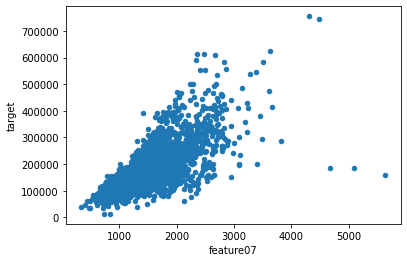

In [302]:
#scatterplot
data.plot.scatter(x = "feature07", y = "target")

<AxesSubplot:xlabel='feature23', ylabel='target'>

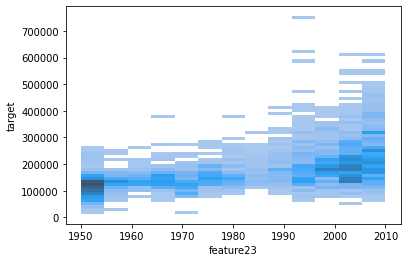

In [303]:
#histogram
sns.histplot(data = data, x = "feature23",y = "target")

<AxesSubplot:xlabel='feature01', ylabel='target'>

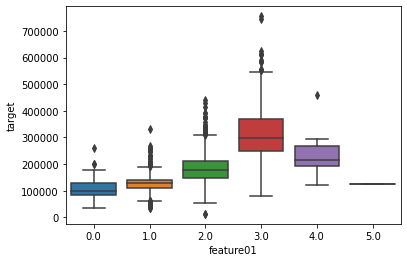

In [304]:
#boxplot
sns.boxplot(x = "feature01", y = "target", data = data)

<AxesSubplot:xlabel='feature01'>

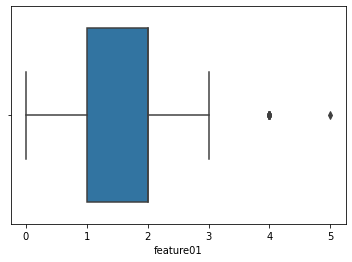

In [305]:
sns.boxplot(x = "feature01", data = data)

## Prepare data for training and testing

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

I will use regression methods: Multiple Linear Regression, KNN och LASSO regression to see which methods gives the lowest Error Metrics.

In [307]:
target_name = "target"
data_no_target = data.drop("target", axis=1)
rob_scale = RobustScaler()
x = data_no_target
x = rob_scale.fit_transform(x)
y = data[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [308]:
diagram = pd.DataFrame(index=["full_model_mse","top10_model_mse","full_model_rmse","top10_model_rmse"], 
                      columns=["NULL", "MLR", "KNN", "LASSO"])
diagram                    

,NULL,MLR,KNN,LASSO
full_model_mse,NaN,NaN,NaN,NaN
top10_model_mse,NaN,NaN,NaN,NaN
full_model_rmse,NaN,NaN,NaN,NaN
top10_model_rmse,NaN,NaN,NaN,NaN


# Null-model for all the data

In [309]:
#null-modell full
y_pred_null = y_train.mean()
print(y_pred_null)
diagram.loc["full_model_mse", "NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
diagram.loc["full_model_rmse", "NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared = False)

181198.38872276805


In [310]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
diagram.loc["full_model_mse","MLR"] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
diagram.loc["full_model_rmse","MLR"] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test, squared = False)

In [311]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform', metric='euclidean')
knn.fit(x_train, y_train)
diagram.loc["full_model_mse", "KNN"] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
diagram.loc["full_model_rmse", "KNN"] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test, squared = False)

In [312]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
diagram.loc["full_model_mse", "LASSO"] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
diagram.loc["full_model_rmse", "LASSO"] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test, squared = False)

C:\Users\jonat\Anaconda3\envs\env3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e+10, tolerance: 1.500e+09
  model = cd_fast.enet_coordinate_descent(


In [313]:
diagram

,NULL,MLR,KNN,LASSO
full_model_mse,6278815928.138765,916781845.442891,952741284.240576,916771434.263959
top10_model_mse,NaN,NaN,NaN,NaN
full_model_rmse,79238.979853,30278.405596,30866.507484,30278.233671
top10_model_rmse,NaN,NaN,NaN,NaN


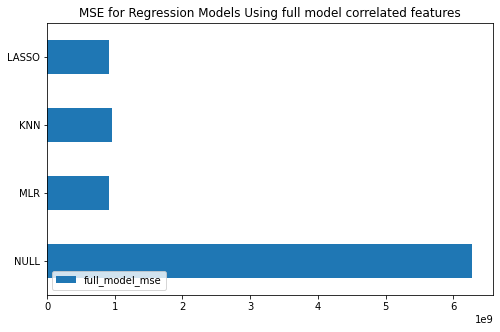

In [314]:
fig, ax = plt.subplots(figsize=(8,5))
diagram.loc["full_model_mse"].plot(kind="barh", ax=ax)
#diagram.plot(kind="barh", ax=ax)
ax.set_title("MSE for Regression Models Using full model correlated features")
ax.legend(loc=3);

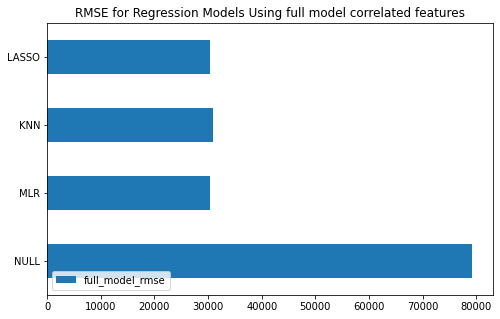

In [315]:
fig, ax = plt.subplots(figsize=(8,5))
diagram.loc["full_model_rmse"].plot(kind="barh", ax=ax)
ax.set_title("RMSE for Regression Models Using full model correlated features")
ax.legend(loc=3);

# Try for top 10

In [316]:
target_name = "target"
x = data[corr_features_new]
x = rob_scale.fit_transform(x)
y = data[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [317]:
y_pred_null = y_train.mean()
print(y_pred_null)
diagram.loc["top10_model_mse", "NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
diagram.loc["top10_model_rmse", "NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared = False)

181198.38872276805


In [318]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
diagram.loc["top10_model_mse","MLR"] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
diagram.loc["top10_model_rmse", "MLR"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared = False)

In [319]:
knn = KNeighborsRegressor(n_neighbors=15, weights="uniform", metric="euclidean")
knn.fit(x_train, y_train)
diagram.loc["top10_model_mse", "KNN"] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
diagram.loc["top10_model_rmse", "KNN"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared = False)

In [320]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
diagram.loc["top10_model_mse", "LASSO"] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
diagram.loc["top10_model_rmse", "LASSO"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test, squared = False)

In [321]:
diagram

,NULL,MLR,KNN,LASSO
full_model_mse,6278815928.138765,916781845.442891,952741284.240576,916771434.263959
top10_model_mse,6278815928.138765,910265125.71264,748586070.205635,910266224.495272
full_model_rmse,79238.979853,30278.405596,30866.507484,30278.233671
top10_model_rmse,79238.979853,79238.979853,79238.979853,79238.979853


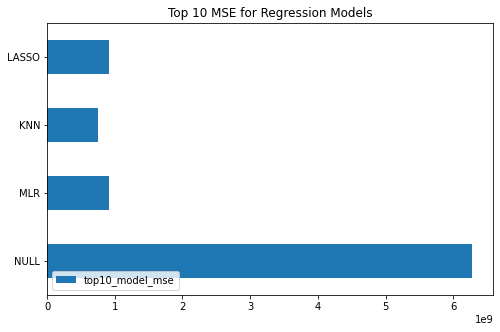

In [322]:
fig, ax = plt.subplots(figsize=(8,5))
diagram.loc["top10_model_mse"].plot(kind="barh", ax=ax)
ax.set_title("Top 10 MSE for Regression Models")
ax.legend(loc=3);

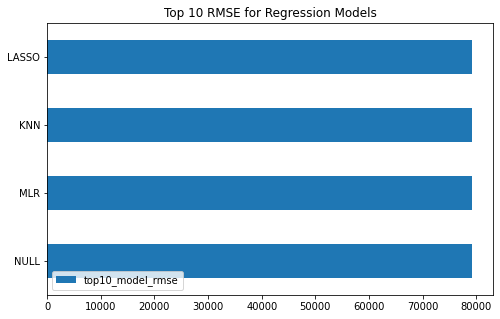

In [336]:
fig, ax = plt.subplots(figsize=(8,5))
#diagram.T.plot(kind="barh", ax=ax)
#diagram.plot(kind="barh", ax=ax)
diagram.loc["top10_model_rmse"].plot(kind="barh", ax=ax)
ax.set_title("Top 10 RMSE for Regression Models")
ax.legend(loc=3);

KNN seems to give the best results

# 6. Prediction

# Create prediction data for the model

In [324]:
ex_pred = OrderedDict([("feature08",9), ("feature07",333), ("feature01",5), ("feature04",1000.0),
                           ("feature10.1",4.0), ("rate_amazing",1), ("feature23",2011), ("rate_bad",0),
                           ("feature14",2.0), ("rate_good",0)])

ex_pred = pd.Series(ex_pred).values.reshape(1,-1)

In [334]:
knn_pred = knn.fit(x_test, y_test)

In [335]:
knn_pred.predict(ex_pred.reshape(1,-1))

array([420674.4])